## Develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan.

## Question: Describe your fraud detection model in elaboration.
The fraud transaction detection model I described is based on a Random Forest classifier, a popular and powerful machine learning algorithm for classification problems. Random Forest is an ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting. In the context of fraud transaction detection, the Random Forest classifier can be used to predict the probability of a transactin being fraudulent based on a set of input features.

*   After the data pre-processing and visualisation procedure, the data is then split into training and testing sets.
*   The training set is then passed into five different models:
1.    Logistic Regression
2.    K-Nearest Neighbours
3.    Random Forest Classifier
4.    Support Vector Machine
5.    Decision Trees
*   As we did not evaluate the models on the other metrics than the accuracy, we are considering the models on the basis of the accuracy.
*   Out of these models, the Random Forest Classifier performed the best with an accuracy of 99%.
*   We further fit the model on the basis of the hyperparameters of the classifier, such as the number of trees, the maximum depth, and the minimum number of samples per leaf, can be tuned using randomized search cross-validation.
*   The model was giving a very high accuracy as 100% with metrics that were not good, which depicts over-fitting due to the class imbalance.
*   Thus, we used Balanced Random Forest Classifier which can be used when class imbalance exists.
*   After fitting the model into BRF, the accuracy obtained is 92% with better metrics.
*   Both the models' accuracies and performance have been depicted in the classification reports respectively.




## Importing the data

In [1]:
import pandas as pd
import numpy as np

In [43]:
# Importing the data
data = pd.read_csv("/content/Fraud.csv")

In [44]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [45]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5395119,377,PAYMENT,5022.65,C452736043,341.0,0.00,M927562725,0.00,0.00,0.0,0.0
5395120,377,PAYMENT,12567.31,C1183914812,11137.0,0.00,M872738452,0.00,0.00,0.0,0.0
5395121,377,CASH_OUT,213644.19,C1336072531,303184.0,89539.81,C1105148033,543220.52,756864.71,0.0,0.0
5395122,377,TRANSFER,1242063.69,C868746513,107706.0,0.00,C1976350436,373752.66,1615816.36,0.0,0.0
5395123,377,PAYMENT,16584.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 01: Dealing with missing values, outliers and multi-collinearity.

In [3]:
# Dealing with missing values
data = data.dropna()

In [4]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

objtype = data.select_dtypes(include = "object").columns
print (objtype)

for feat in objtype:
    data[feat] = LE.fit_transform(data[feat].astype(str))

print (data.info())

Index(['type', 'nameOrig', 'nameDest'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42270 entries, 0 to 42269
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42270 non-null  int64  
 1   type            42270 non-null  int64  
 2   amount          42270 non-null  float64
 3   nameOrig        42270 non-null  int64  
 4   oldbalanceOrg   42270 non-null  float64
 5   newbalanceOrig  42270 non-null  float64
 6   nameDest        42270 non-null  int64  
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 3.9 MB
None


## Question: Dealing with multicollinearity
Multicollinearity occurs when independent variables in a regression model are highly correlated with each other, which can lead to unstable and unreliable regression coefficients. VIF (Variance Inflation Factor) is a statistical measure used to detect multicollinearity in a multiple linear regression model.

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(data)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,5.052578
1,type,5.976194
2,amount,1.894232
3,nameOrig,3.444346
4,oldbalanceOrg,384.974211
5,newbalanceOrig,389.349357
6,nameDest,4.228430
7,oldbalanceDest,8.994939
8,newbalanceDest,10.055253
9,isFraud,1.040841


## Data Exploration

In [40]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,4925,170136.0,160296.36,14933,0.0,0.0,0.0,0.0
1,1,3,1864.28,14492,21249.0,19384.72,15557,0.0,0.0,0.0,0.0
2,1,4,181.00,6538,181.0,0.00,4059,0.0,0.0,1.0,0.0
3,1,1,181.00,38737,181.0,0.00,3611,21182.0,0.0,1.0,0.0
4,1,3,11668.14,22834,41554.0,29885.86,7454,0.0,0.0,0.0,0.0


In [41]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
42265,9,3,1011.16,37861,317.0,0.0,6340,0.00,0.00,0.0,0.0
42266,9,1,195364.06,2051,0.0,0.0,2784,506957.59,1343781.67,0.0,0.0
42267,9,1,546075.62,17187,0.0,0.0,115,5075471.31,5621546.93,0.0,0.0
42268,9,1,111003.87,3081,0.0,0.0,4549,2533159.94,2644163.81,0.0,0.0
42269,9,1,101025.44,26666,0.0,0.0,3366,156646.32,491301.04,0.0,0.0


In [42]:
data.describe()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,42270.000000,42270.000000,4.227000e+04,42270.000000,4.227000e+04,4.227000e+04,42270.000000,4.227000e+04,4.227000e+04,42270.000000,42270.0
mean,7.171043,2.032600,1.490079e+05,21134.500000,7.727917e+05,7.874251e+05,8263.354814,8.450982e+05,1.158405e+06,0.002224,0.0
std,2.118044,1.344854,3.145036e+05,12202.442276,2.284027e+06,2.321965e+06,7300.649599,2.466743e+06,2.960508e+06,0.047105,0.0
min,1.000000,0.000000,1.770000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,1.000000,7.031788e+03,10567.250000,0.000000e+00,0.000000e+00,2382.000000,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,3.000000,2.750919e+04,21134.500000,1.856867e+04,3.347050e+02,4860.500000,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,3.000000,1.794255e+05,31701.750000,1.422038e+05,1.500350e+05,14056.750000,4.337969e+05,8.013660e+05,0.000000,0.0
max,9.000000,4.000000,1.000000e+07,42269.000000,2.854724e+07,2.861740e+07,24624.000000,2.958454e+07,3.130692e+07,1.000000,0.0


## Data Visualisation

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Distribution of true and fraudulent transactions.

In [7]:
truee = len(data[data.isFraud == 0])
fraud = len(data[data.isFraud == 1])

print("Number of True transactions: ", truee)
print("Number of Fraud transactions: ", fraud)

Number of True transactions:  42176
Number of Fraud transactions:  94


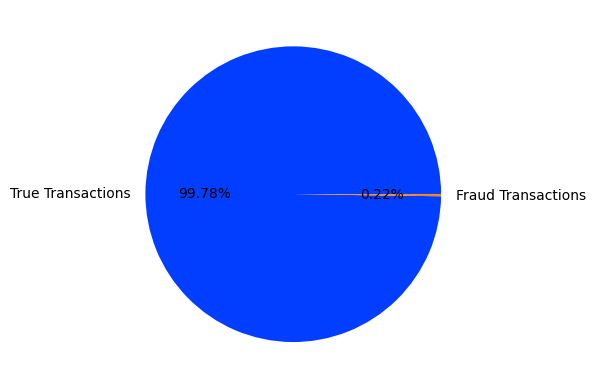

In [8]:
truee_percentage = (truee / (fraud + truee)) * 100
fraud_percentage = (fraud / (fraud + truee)) * 100

import matplotlib.pyplot as plt
import seaborn

# declaring data for the pie chart
dataa = [truee_percentage, fraud_percentage]
keys = ['True Transactions', 'Fraud Transactions']

# defining Seaborn color palette to use
palette_color = seaborn.color_palette('bright')

# plotting data on chart
plt.pie(dataa, labels=keys, colors=palette_color, autopct='%.2f%%')

# displaying chart
plt.show()

Histograms of all the balances.

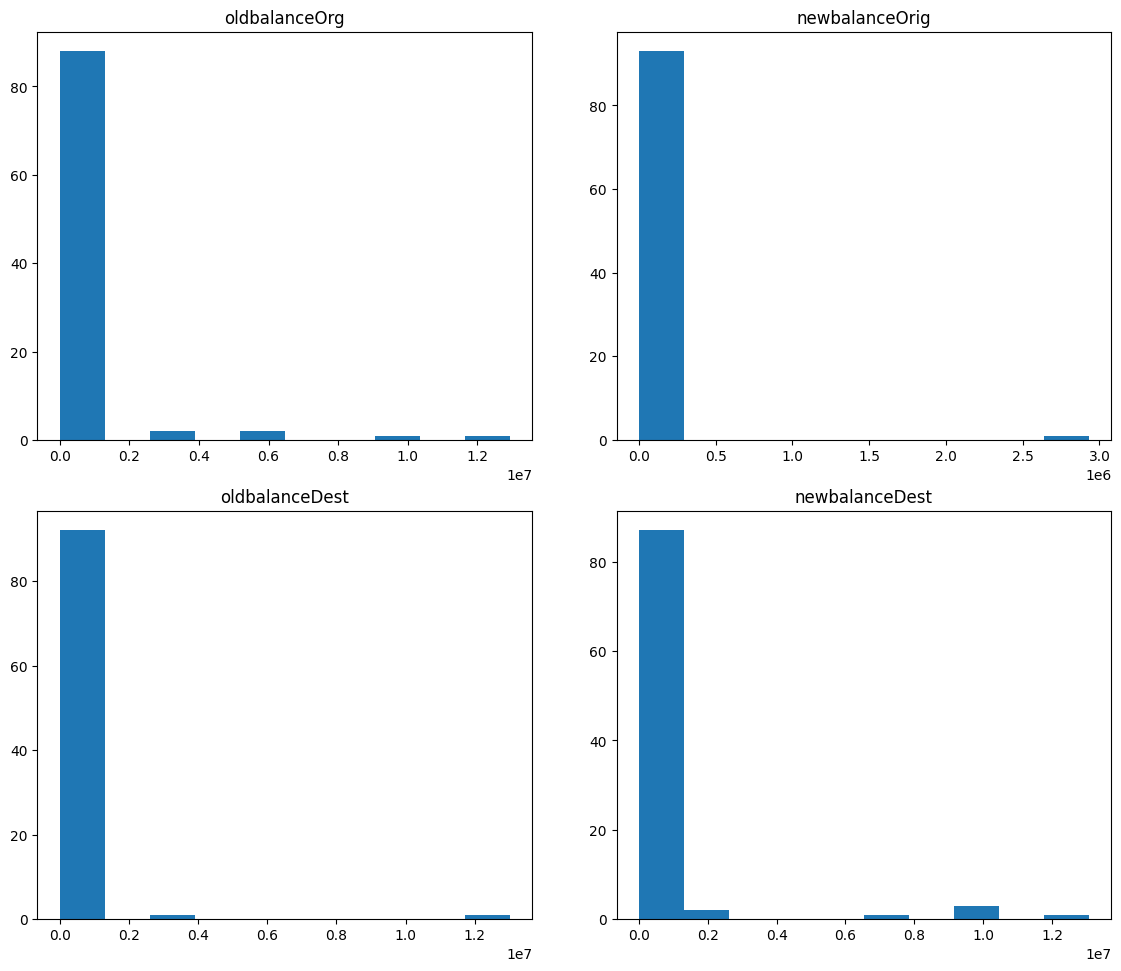

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('oldbalanceOrg')
ax[0,0].hist(data.oldbalanceOrg[data.isFraud==1]);
ax[0,1].set_title('newbalanceOrig')
ax[0,1].hist(data.newbalanceOrig[data.isFraud==1]);
ax[1,0].set_title('oldbalanceDest')
ax[1,0].hist(data.oldbalanceDest[data.isFraud==1]);
ax[1,1].set_title('newbalanceDest')
ax[1,1].hist(data.newbalanceDest[data.isFraud==1]);

Seaborn paiplot of all dependencies.

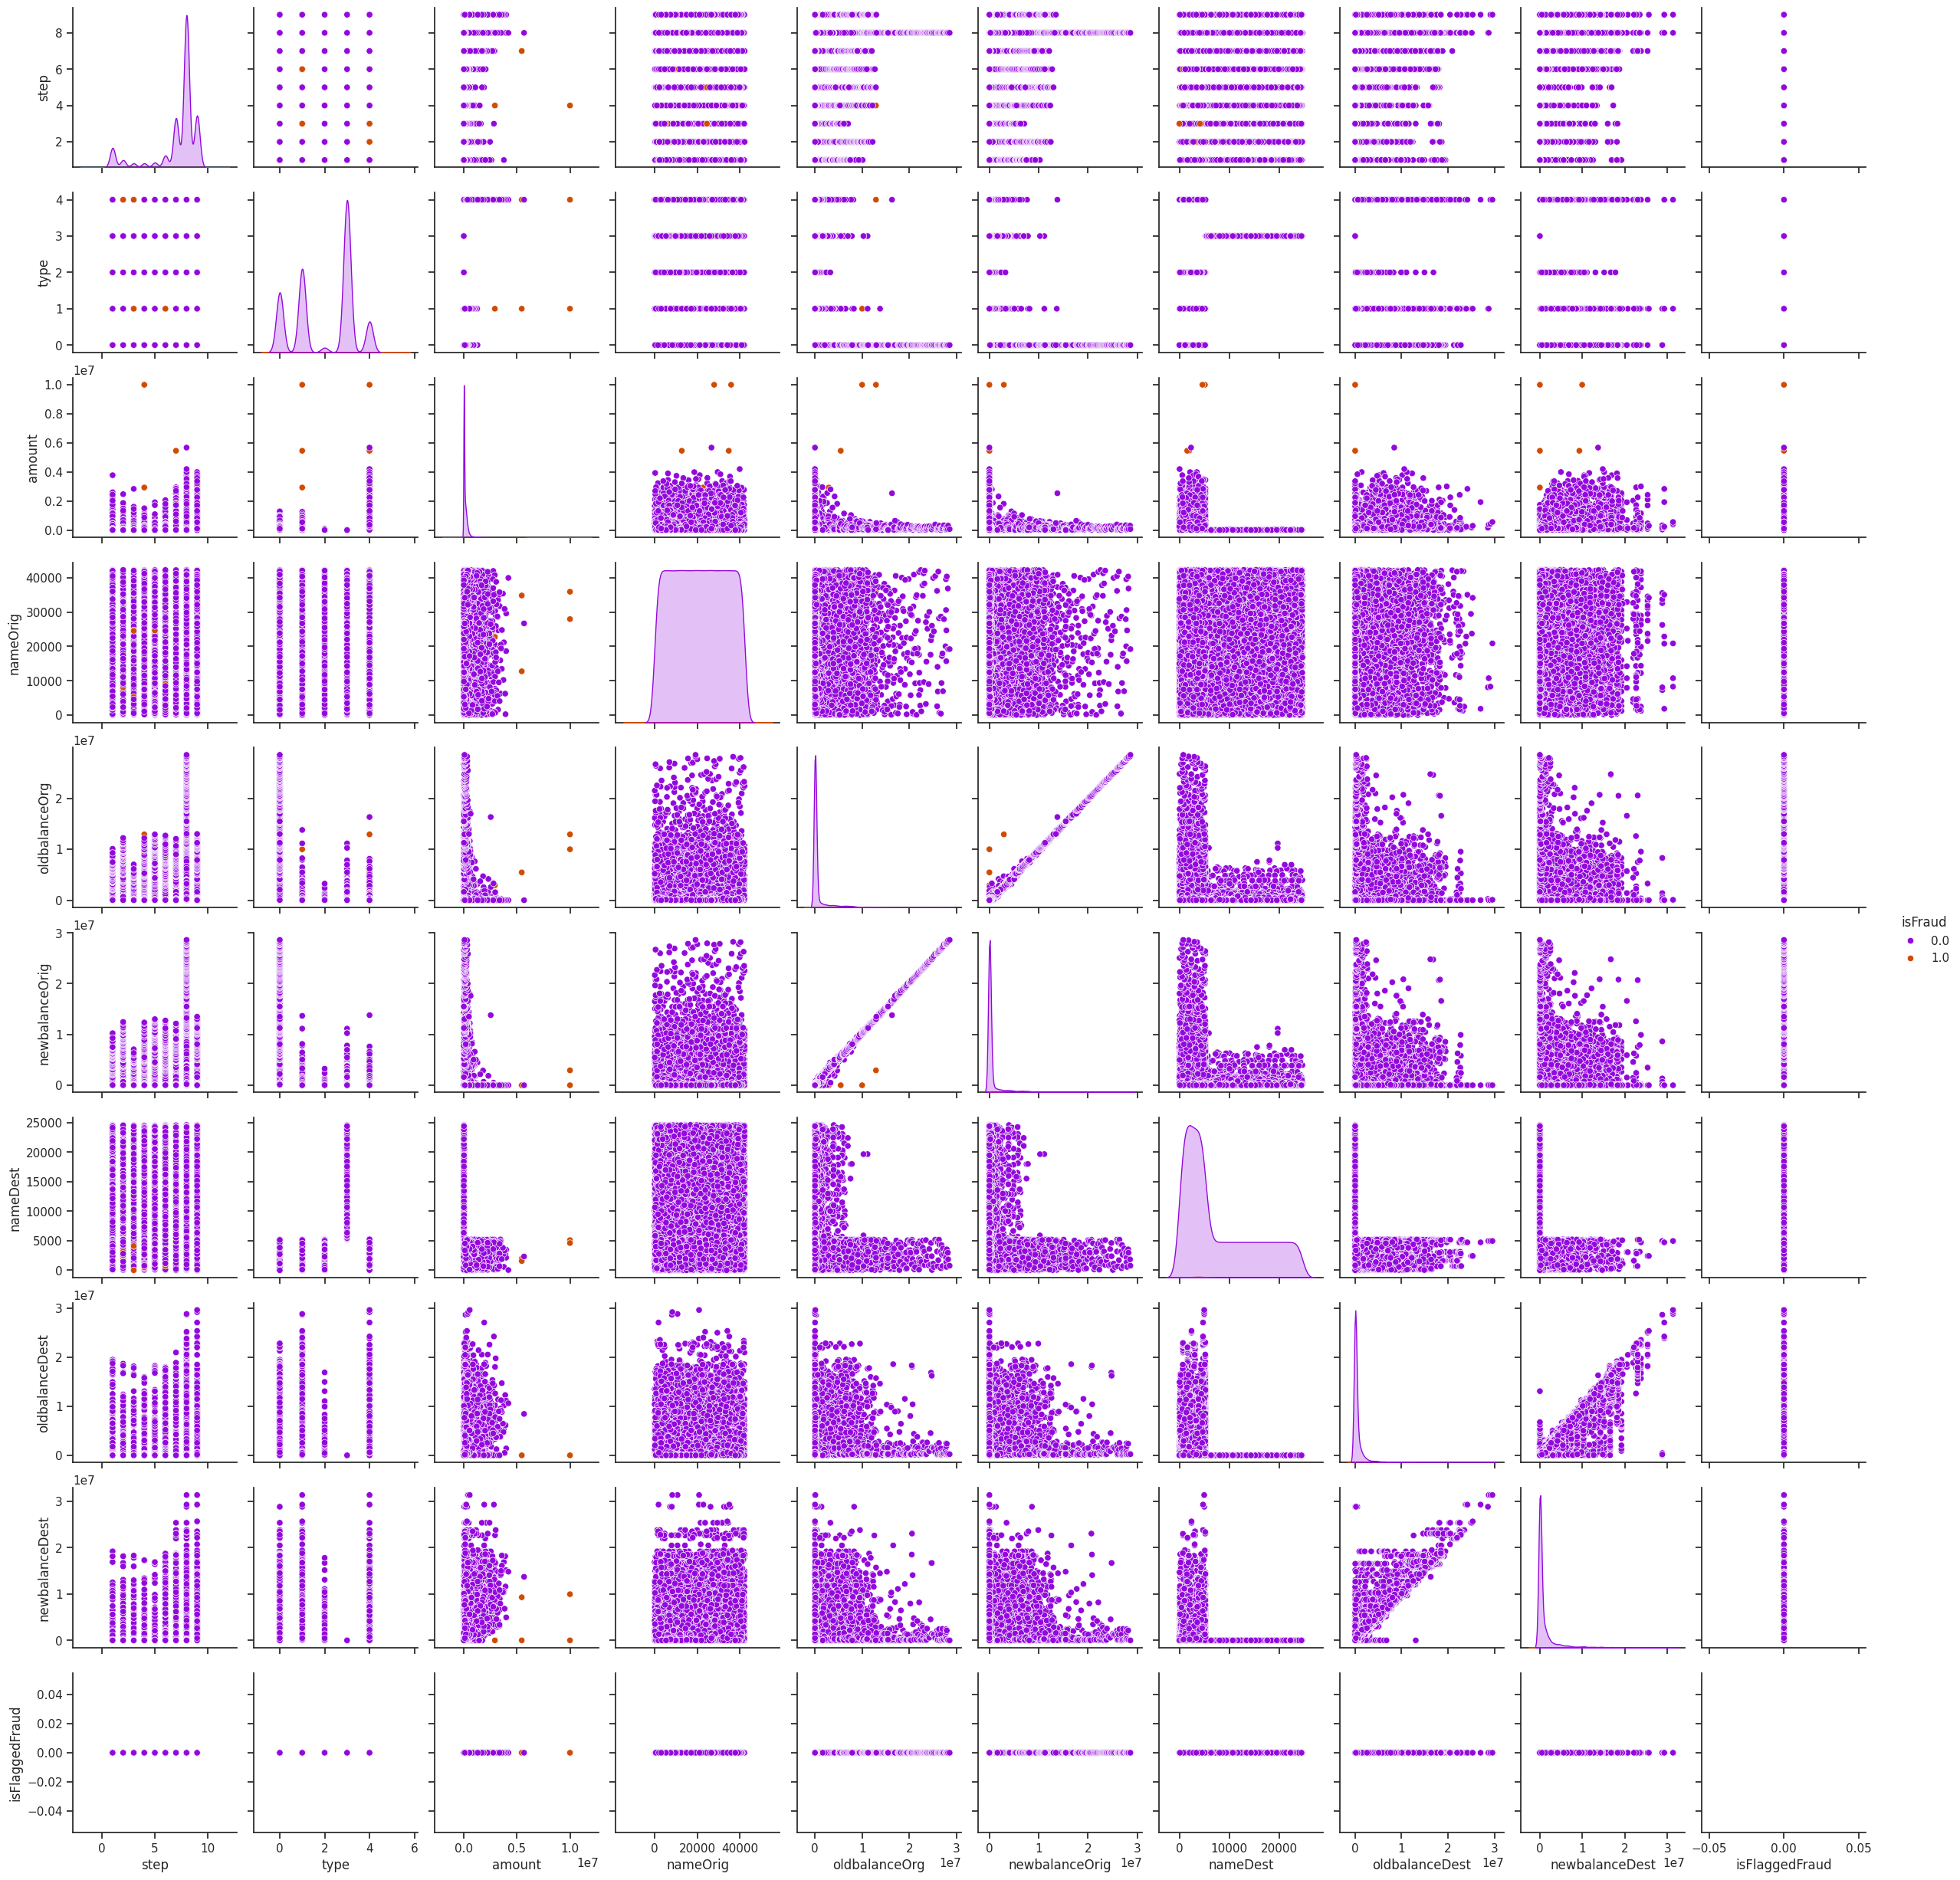

In [10]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,hue='isFraud',palette='gnuplot');

Correlation of all the dependencies.

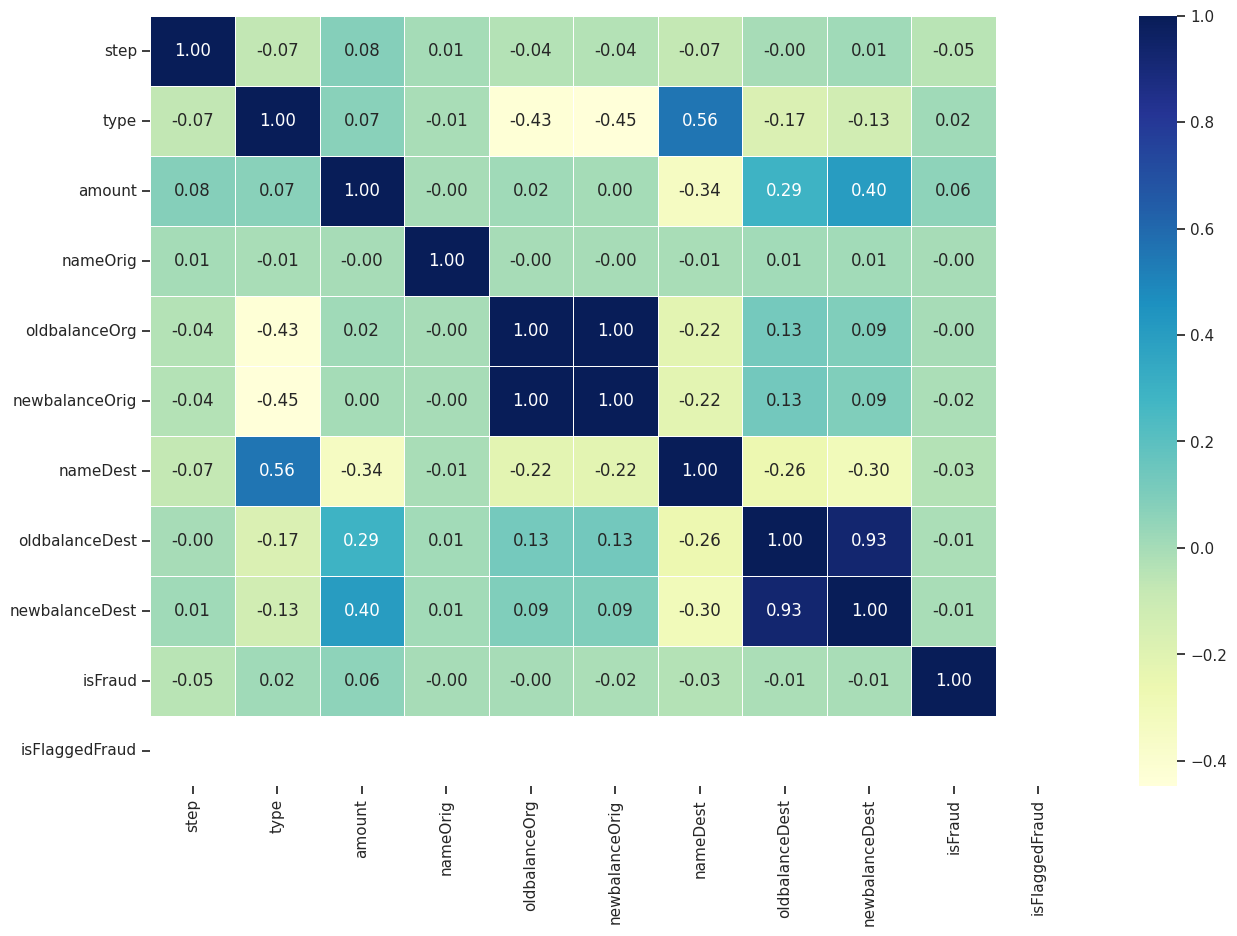

In [11]:
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## Modelling

In [12]:
#importing Libraries
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

#for warning
from warnings import filterwarnings
filterwarnings("ignore")

Splitting the data into training and testing sets with a ratio of 80:20.

In [13]:
#random data shuffelin
data.sample(frac=1)

#Spliting the data
X = data.drop("isFraud",axis=1)
y = data["isFraud"]
X_train,X_test,y_train,y_test =  train_test_split(X,
                                              y,
                                              test_size=0.2)

In [14]:
(len(X_train),len(X_test))

(33816, 8454)

## Comparison of different machine learning algorithms:


1.   Logistic Regression
2.   K-Nearest Neighbours
3.   Random Forest Classifier
4.   Support Vector Machine
5.   Decision Trees



In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);

# Evaluating the model
log_reg = log_reg.score(X_test,y_test)

In [16]:
# K-Nearest Neighbours
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);

# Evaluating the model
knn = knn.score(X_test,y_test)

In [17]:
# Random Forest Classifier
clf= RandomForestClassifier()
clf.fit(X_train,y_train);

# Evaluating the model
clf = clf.score(X_test,y_test)

In [18]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train,y_train)

# Evaluating the model
svm = svm.score(X_test,y_test)

In [19]:
# Decision Trees
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train);

# Evaluating the model
dt = dt.score(X_test, y_test)

In [20]:
#Comparing the five machine learning algorithms

model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                           "Support Vector Machine":svm,
                           "Decision Tree Classifier": dt,
                            },index=["accuracy"])

In [21]:
model_compare

,Logistic Regression,KNN,Random Forest Classifier,Support Vector Machine,Decision Tree Classifier
accuracy,0.997634,0.997398,0.998935,0.997634,0.998107


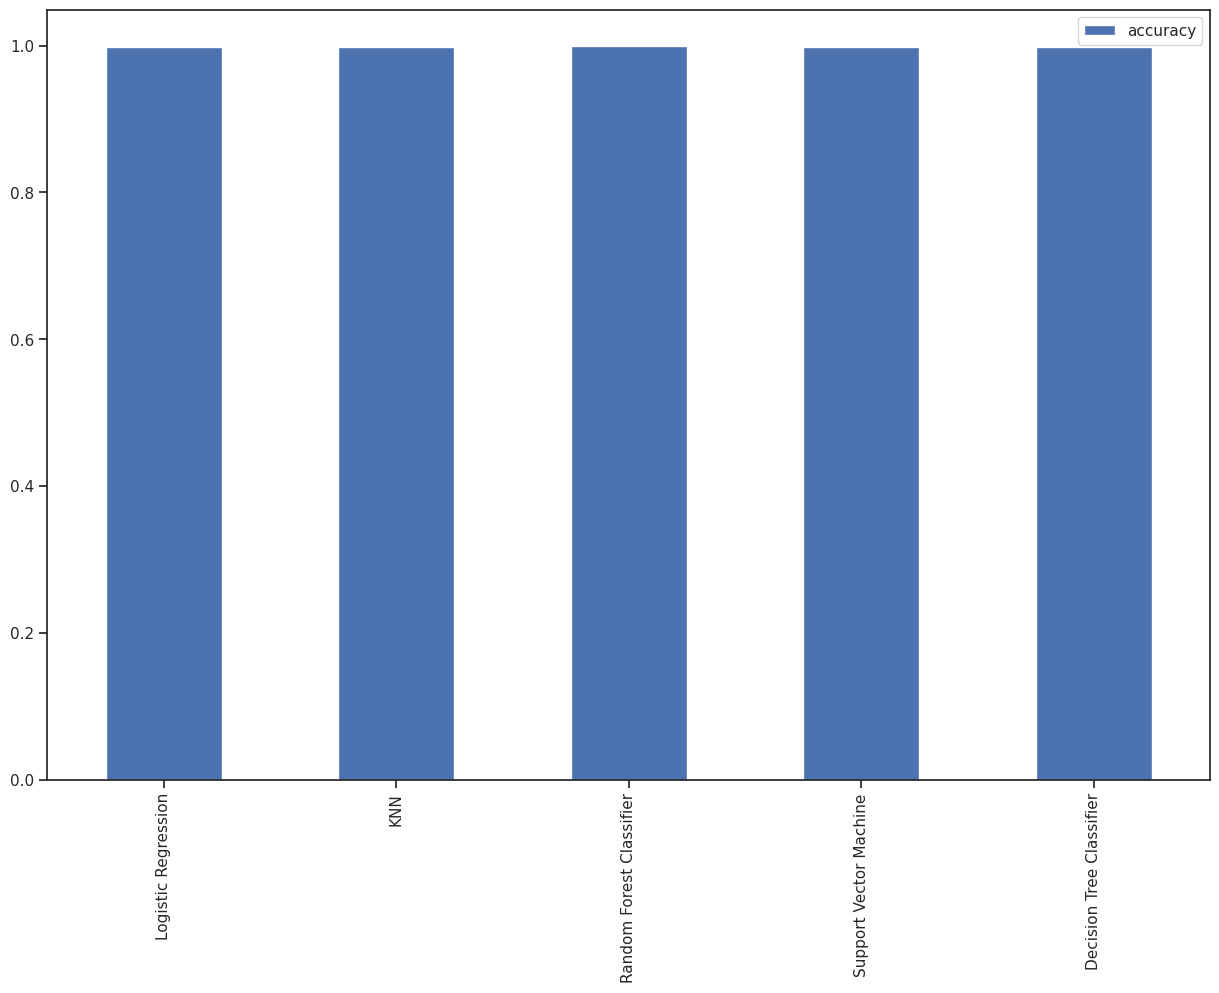

In [22]:
model_compare.T.plot.bar(figsize=(15,10));

Random Forest Classifier has the highest accuracy.

## Random Foresct Classifier
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.
The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.
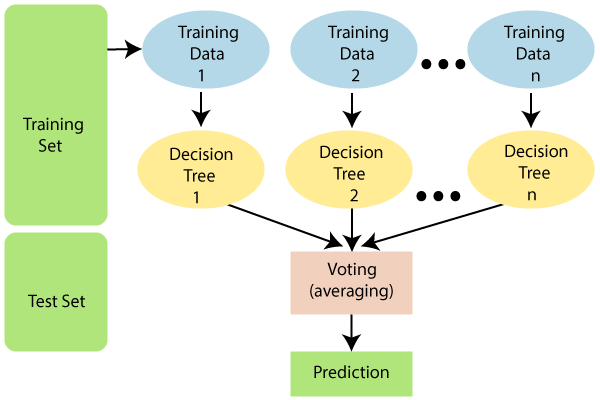

In [24]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize the random number generator
np.random.seed(42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Define the parameter grid for Random Forest
rf_grid = {
    "n_estimators": [10, 50, 100, 200],     # The number of trees in the Random Forest; represents different sizes of the forest, ranging from 10 to 200 trees.
    "max_depth": [None, 10, 20, 30],      # The maximum depth of each tree in the Random Forest; represents different maximum depths, ranging from none (i.e., no limit) to 30.
    "min_samples_split": [2, 5, 10],      # The minimum number of samples required to split an internal node; represent different minimum sample sizes, ranging from 2 to 10.
    "min_samples_leaf": [1, 2, 4],      # The minimum number of samples required to be a leaf node; represents different minimum sample sizes, ranging from 1 to 4.
    "bootstrap": [True, False]      # Determines whether bootstrap sampling is used when building trees; represents whether bootstrap sampling is used (True) or not (False).
}

# Set up the random hyperparameter search for Random Forest
rs_rf = RandomizedSearchCV(estimator=rf,      # The Random Forest model that will be tuned.
                           param_distributions=rf_grid,     # Defines the parameter grid for hyperparameter tuning.
                           cv=5,      # Defines the number of cross-validation folds to use in the hyperparameter tuning process.
                           n_iter=20,     # Defines the number of parameter settings that will be sampled for hyperparameter tuning.
                           verbose=True,    # Prints the progress of the hyperparameter tuning process.
                           random_state=42)   # Ensures reproducibility of the results.

# Fit the random hyperparameter search model for Random Forest
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42, verbose=True)

In [25]:
# Calculating the model score
score = rs_rf.score(X_test,y_test)
score

0.9988171279867518

In [26]:
y_preds = rs_rf.predict(X_test)     # Contains the predicted values
y_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[8434    0]
 [  10   10]]


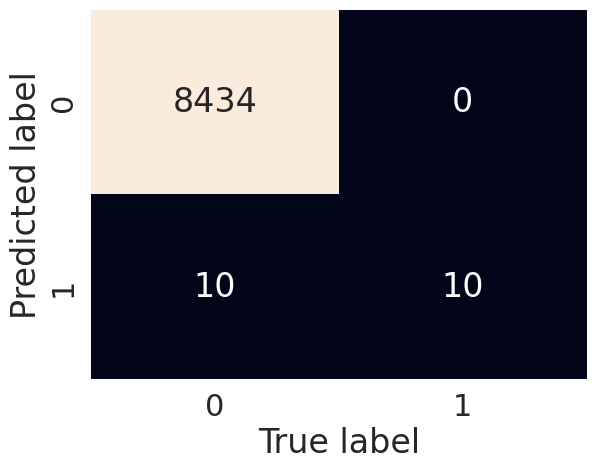

In [28]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

Classification Report with Randomized Search

In [29]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8434
         1.0       1.00      0.50      0.67        20

    accuracy                           1.00      8454
   macro avg       1.00      0.75      0.83      8454
weighted avg       1.00      1.00      1.00      8454



## Balanced Random Forest
In imbalance learning, the likelihood of bootstrap samples containing few or none of the minority classes increases notably, resulting in a model being a lousy predictor of the minority class. To overcome this limitation, it is crucial to make class priors equal, either by downsampling or oversampling. Hence, BRF does this by iteratively drawing a bootstrap sample with equal proportions of data points from both the minority and the majority class. The code below shows the implementation of BRF for the imbalanced insurance dataset.

In [30]:
pip install imbalanced-learn

In [31]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [32]:
brf = BalancedRandomForestClassifier(random_state=42)

In [33]:
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=42)

In [34]:
y_pred_brf = brf.predict(X_test)

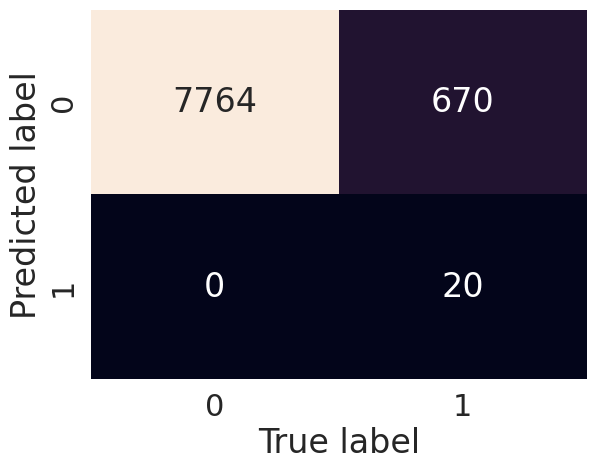

In [36]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred_brf), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [35]:
print(classification_report(y_test, y_pred_brf))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      8434
         1.0       0.03      1.00      0.06        20

    accuracy                           0.92      8454
   macro avg       0.51      0.96      0.51      8454
weighted avg       1.00      0.92      0.96      8454



## Demonstrate the performance of the model by using best set of tools.

For Random Forest Classifier

Confusion Matrix:
[[8434    0]
 [  10   10]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8434
         1.0       1.00      0.50      0.67        20

    accuracy                           1.00      8454
   macro avg       1.00      0.75      0.83      8454
weighted avg       1.00      1.00      1.00      8454



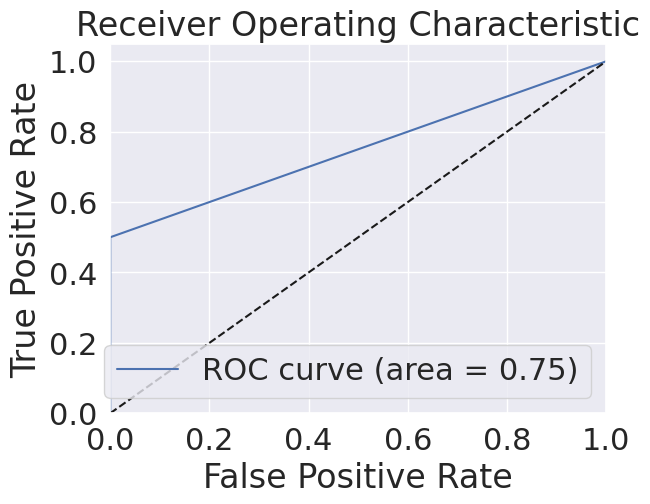

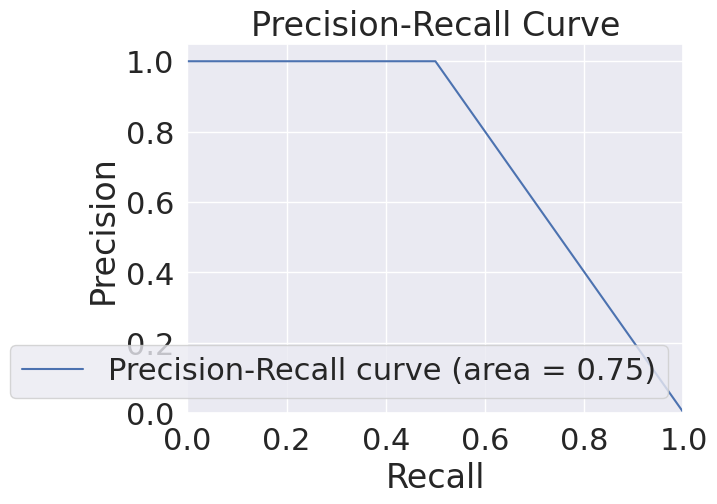

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_true is the true label vector and y_pred is the predicted label vector

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_preds))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_preds))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_preds)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % auc(recall, precision))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

Balanced Random Forest

Confusion Matrix:
[[7764  670]
 [   0   20]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      8434
         1.0       0.03      1.00      0.06        20

    accuracy                           0.92      8454
   macro avg       0.51      0.96      0.51      8454
weighted avg       1.00      0.92      0.96      8454



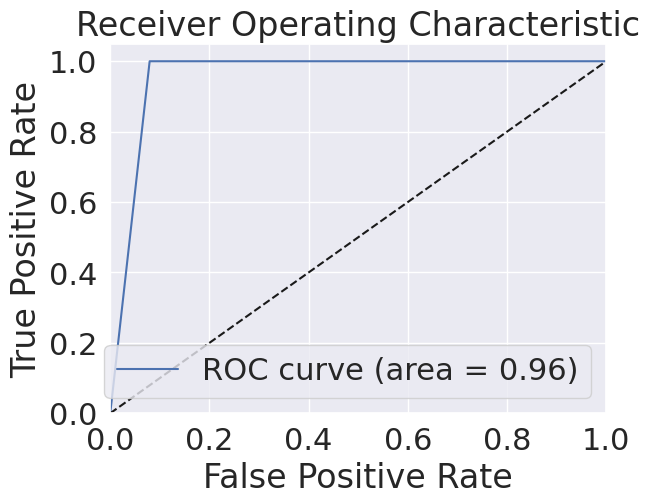

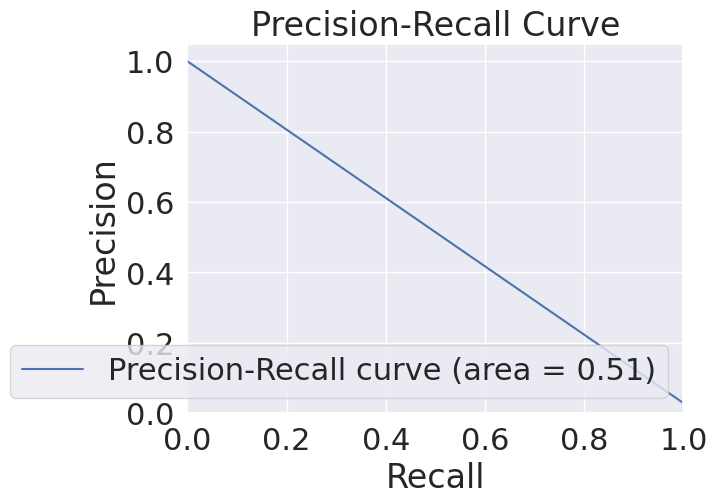

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_true is the true label vector and y_pred is the predicted label vector

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_brf))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_brf))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_brf)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_brf)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % auc(recall, precision))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

## Comparison between Random Forest Classifier and Balanced Random Forest Classifier:
Based on the classification reports, BRF is better overall, even though the FC has a higher accuracy. This is because accuracy can be misleading when there is an imbalance in the class distribution, as seen in the data visualisation section. The RFC has higher recall and F1-score for class 0, which is the majority class, and a higher precision for class 1, which is the minority class.

While the RFC has perfect recall and precision for class 0, it completely misses class 1, as shown by the low recall and F1-score, respectively. This means that the RFC is not useful for detecting instances of class 1.

On the other hand, the BRF has a much higher recall and F1-score for class 1, even though the precision is low. This means that the BRF is better at detecting instances of the minority class, even though it may produce some false positives.

Therefore, the BRF is generally better than the RFC, even though the RFC model has a higher accuracy. It is important to consider multiple metrics, such as recall, precision, and F1-score, when evaluating a classification model, especially when there is an imbalance in the class distribution as in this case.



## Question: What kind of prevention should be adopted while company update its infrastructure? Assuming these actions have been implemented, how would you determine if they work?
Companies can take preventive measures in three aspects:


1.   Projects: Implement the use of technologies in a way of prediction models to make sure that the technologies beig used are planned thoroughly and make sure that the technology or the project being used has features like backup to minimize the loss of critical data or corruption during the update process. Lastly, before deploying the new infrastructure, perform thorough testing to ensure that everything works as expected.
2.   Security: Ensure that the new infrastructure meets the company's security requirements including the implementation of firewalls, intrusion detection systems, and other security measures to protect against cyber threats. Implement access controls to ensure that only authorized personnel have access to the new infrastructure.
3.   Maintainance: Provide training to the relevant personnel to ensure that they are familiar with the new infrastructure and can use it effectively. Document the new infrastructure, including the configuration, installation, and maintenance procedures. This will help ensure that the system can be managed and maintained effectively over time.

We can determine if these measures work by:


1.   Testing: Testing the implemented software and hardware infrastructure needs to be done to ensure if it meets the security requirements. Monitor the new infrastructure closely to ensure that it is functioning correctly to tracking system performance, identifying potential issues, and resolving them promptly.
2.   Tracking: Track metrics such as system uptime, response time, and error rates. This helps measure the performance of the new infrastructure and identify any areas for improvement.
3.   Feedback: Collect feedback from the users of the new infrastructure to identify any issues or areas for improvement.






## What are the key factors that predict fraudulent customer? Do these factors make sense? If yes, How? If not, How not?

As per the data provided to us, the following are the key factors that can help predict te fraudulent customers and make sense due to the following specified reasons:
1.   Transaction Amount: Large transaction amounts could be an indicator of fraud.
2.   Change in Account Balance: A significant change in account balance could be a sign of fraudulent activity.
3.   Type of Transaction: Certain transaction types could be more susceptible to fraud than others.
4.   Customer Name: Changes in customer names associated with an account could indicate fraudulent activity.
5.   Fraud Flag: This flag can be used as the target variable to train a model to predict fraud.

However, these factors alone may not be sufficient to predict fraudulent transaction activity, and other factors such as customer behavior patterns, device information, and geolocation data could also be useful in building a comprehensive fraud detection model.


